<a href="https://colab.research.google.com/gist/jonghank/03d9de10439107bae746691b01dcab52/ase3001_exercises_random_walk_in_financial_markets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random walk in financial markets

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

<br>

몬테칼로 방법을 사용하면 자산의 과거 정보를 사용하여 미래 가치를 추산해볼 수 있다. 한 자산에서 매일 발생하는 이익을 정규분포로 가정하며, 이와 같이 랜덤한 효과가 더해짐으로써 시스템이 진화하는 현상을 "random walk"라고 부른다.

다음 셀을 실행하면 삼성전자 주식의 과거 20년치 주가를 다운로드한다.

[*********************100%%**********************]  1 of 1 completed


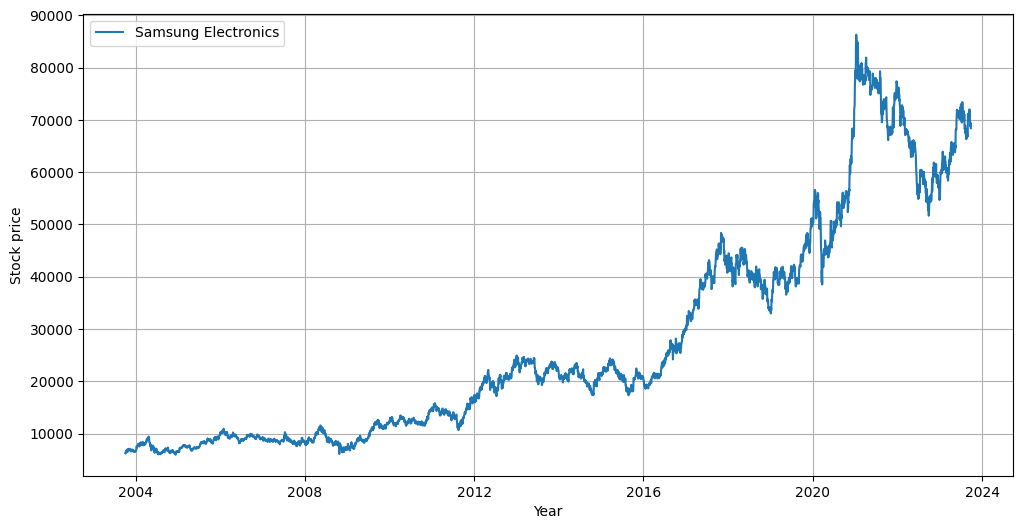

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
import datetime as dt

end = dt.datetime.today()
start = dt.datetime(end.year-20, end.month, end.day)

ss = yf.download('005930.KS', start, end)

plt.figure(figsize=(12,6), dpi=100)
plt.plot(ss['Adj Close'], label='Samsung Electronics')
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.grid()
plt.legend()
plt.show()

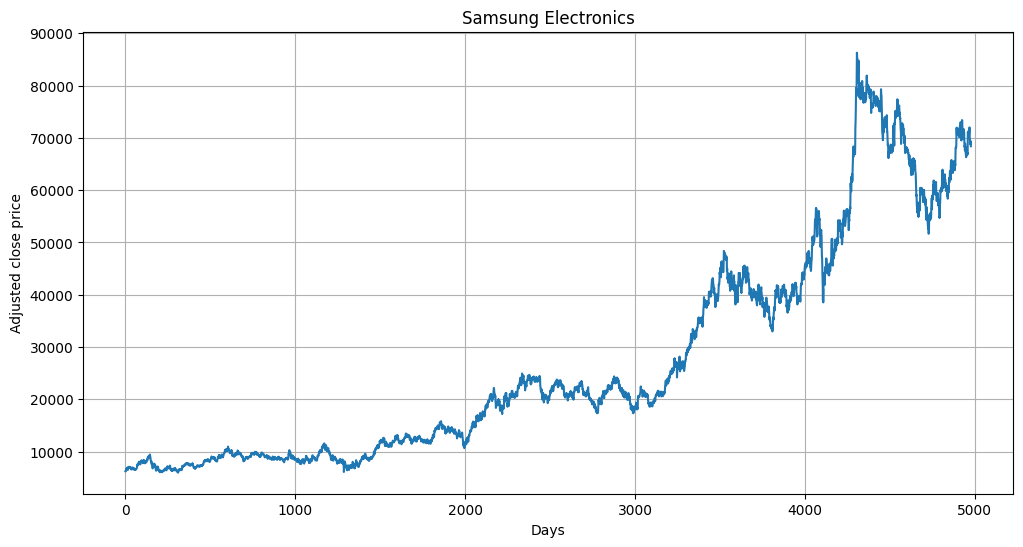

In [ ]:
price = ss['Adj Close'].values

plt.figure(figsize=(12,6), dpi=100)
plt.plot(price)
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Adjusted close price')
plt.title('Samsung Electronics')
plt.show()

<br>

일수익률은 (daily return) 하루 사이의 자산 가치 상승율을 퍼센트로 나다낸 것으로, 날짜 $t$에서의 가치를 $p_t$라 할 때, 그 날의 일수익률($r_t$)은 다음과 같이 계산할 수 있다.

$$
  r_t = \frac{p_t - p_{t-1}}{p_{t-1}}\times 100 \text{  (%)}
$$





<br>

변동성은 (volatility) 일수익률의 표준편차로 정의되며, 연간 변동성은 (annual volatility) 일수익률의 표준편차($v_t$)에 $\sqrt{252}$를 곱해서 얻을 수 있다 (주식시장이 1년에 대략 252일 열린다고 가정함).

$$
  \sigma_\text{annual} = \sqrt{\frac{252}{\tau}\sum_{t}^\tau\left({r_t - \bar{r}}\right)^2}
$$

여기서 $\tau$는 우리가 데이터 처리에 사용한 데이터의 기간이(일 수) 된다.

<br>

_**(Problem 1)**_ 이 자산의 연간 변동성($\sigma_\text{annual}$)은 몇 퍼센트인가?

In [ ]:
# your code here



Annual Volatility:   28.74%


<br>

연평균증가율은 (Compound annual growth rate, CAGR) 데이타 구간 전체에서의 자산의 증가율을 연 단위로 환산한 것으로, 다음과 같이 계산할 수 있다.

$$
\text{CAGR} = \left(\left(\frac{p_\tau}{p_1}\right)^{252/\tau}-1\right)\times 100 \text{ (%)}
$$


<br>

_**(Problem 2)**_ 이 자산의 연평균증가율(CAGR)은 몇 퍼센트인가?

In [ ]:
# your code here



Compound Annual Growth Rate:    8.59%


<br>

이제 하나의 자산을 연평균증가율과 연간 변동성 등, 두 가지의 숫자로 표현했다. 연평균 증가율(CAGR)은 수익률 측면을, 연간 변동성($\sigma_\text{annual}$)은 위험도를 설명하는 수치로 이해하면 된다.

이제 이 둘을 활용해서 이 자산의 미래 가치를 예측해보자. 즉, 자산의 가치 ($p_t$)가 아래의 역학을 따라 진화한다고 가정한다. 여기서 $\tilde{r}$은 $\text{CAGR}/252$를 평균으로 하고, $\sigma_\text{annual}/\sqrt{252}$를 표준편차로 하는 정규분포를 따르는 난수이다.

$$
  p_{t+1} = p_{t}\left( 1+\tilde{r}_{t}\right)
$$


<br>

_**(Problem 3)**_ 이 자산이 향후 1년간 어떻게 변화할지 예측해 보시오.즉, 매 순간 난수 $\tilde{r}_t$를 발생시키며 $p_{\tau+1},\dots,p_{\tau+252}$를 예측해 보시오. 과거 20년간의 데이터에 미래 1년의 데이터를 덧입혀 플롯해 보고, 자연스러운 그래프가 얻어졌는지 확인해 보시오. 참고로, 결과가 아래와 같은 그래프로 표현되면 된다.

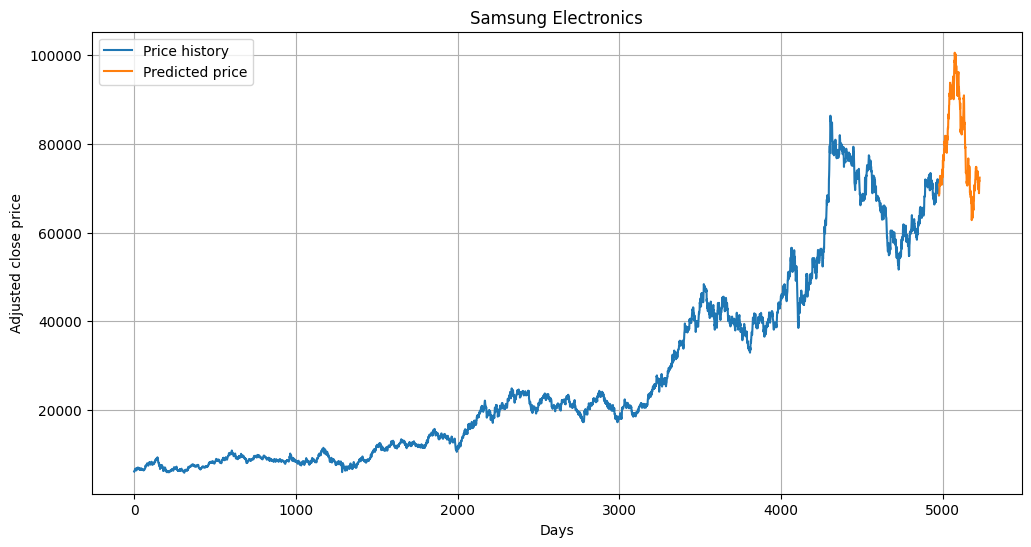

In [ ]:
# your code here



<br>

_**(Problem 3)**_ 위와 같은 시뮬레이션을 10,000회 수행하여, 1년 후 자산 가치를 히스토그램으로 표현하시오. 참고로, 결과가 아래와 같은 그래프로 표현되면 된다.


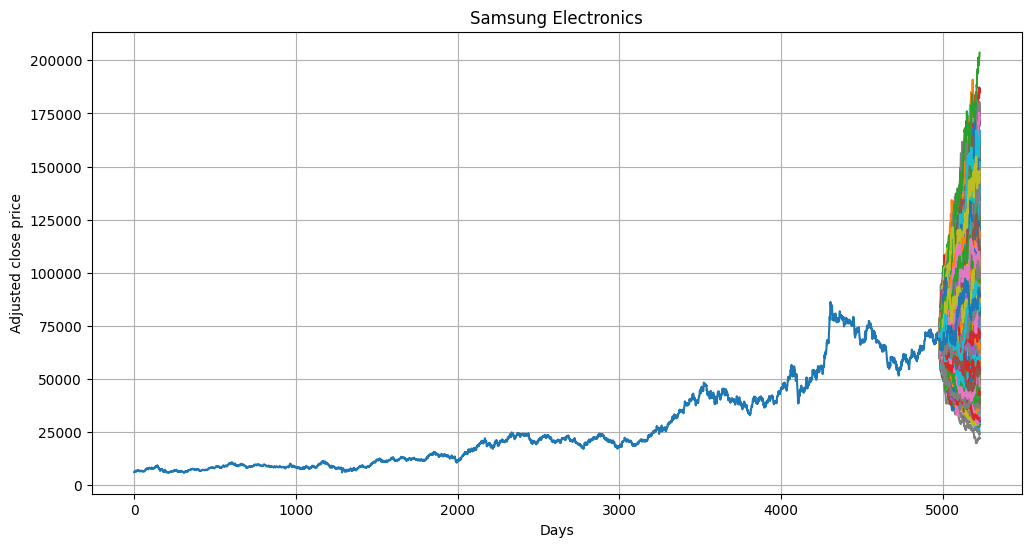

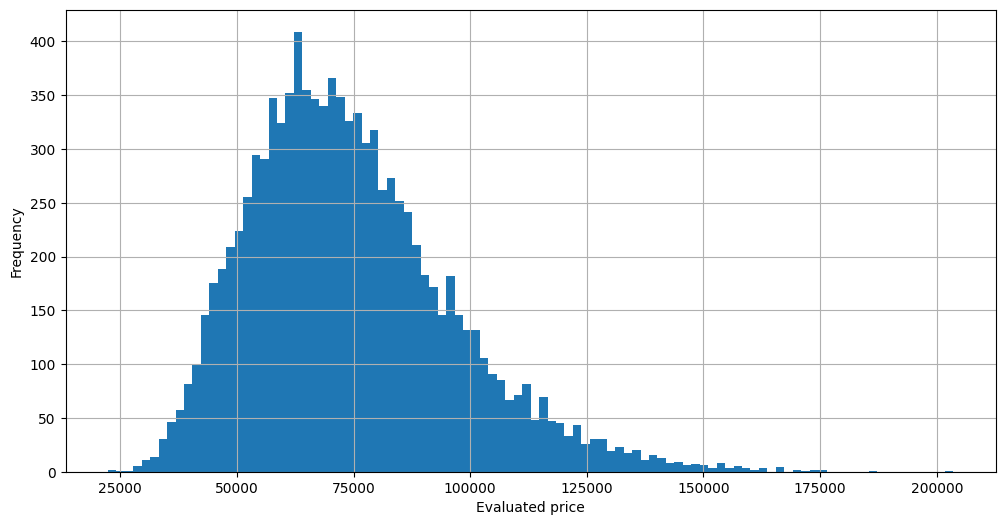

In [ ]:
# your code here



<br>

_**(Problem 4)**_  위의 몬테칼로 시뮬레이션 결과를 활용하여 이 자산의 1년 후 가치에 대한 아래의 질문에 답하시오. 참고로, 결과를 아래와 같은 그래프와 함께 표현하시오.

- 1년 후 자산 가치는 평균적으로 어느 정도 될까?

- 95% 신뢰도로 달성할 수 있는 1년 후 최소 자산 가치는 얼마나 될까?

- 1년 후 이 자산이 두배 이상의 가치를 가질 확률은 얼마일까?

- 1년 후 이 자산이 반토막 이하가 될 확률을 계산하시오.


Current price: 68400.00
Expected value: 74370.17
5-percentile value: 44162.35
Prob_double: 1.14(%)
Prob_half: 0.48(%)


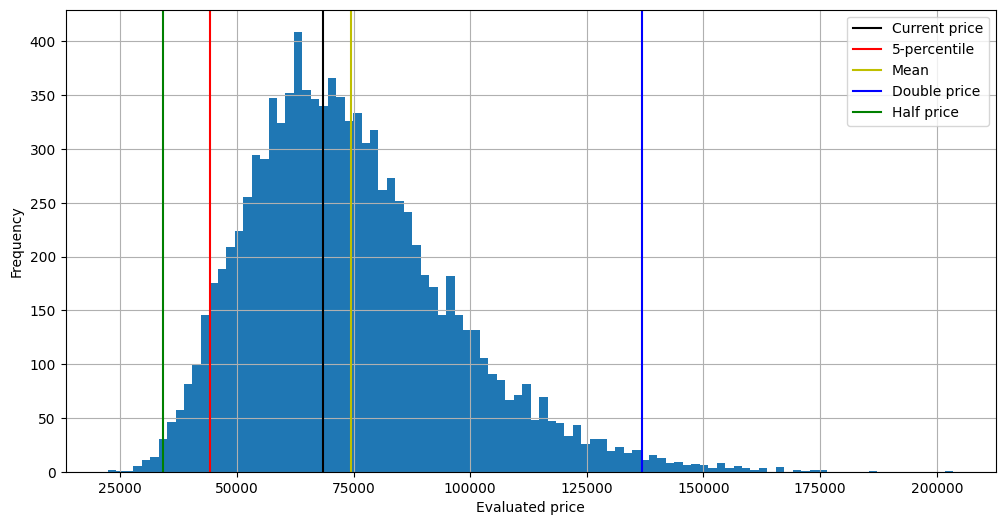

In [ ]:
# your code here

